# requirments

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
!gdown --id 1eUGUWzme9-B-yGizwBWNgS02_0CbLs2p #train data

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1eUGUWzme9-B-yGizwBWNgS02_0CbLs2p
To: /content/train.csv
100% 988k/988k [00:00<00:00, 9.42MB/s]


In [ ]:
data = pd.read_csv('train.csv')

# EDA

In [ ]:
data.shape

(7613, 5)

In [ ]:
data.sample(5)

,id,keyword,location,text,target
5279,7544,oil%20spill,Corpus Christi,'California: Spring Oil Spill Estimate Grows '...,1
4755,6765,lightning,NaN,iCASEIT - MFi Certified Lightning Cable - 1m h...,0
365,523,army,NaN,One Direction Is my pick for http://t.co/q2eBl...,0
3260,4682,engulfed,"Kokomo, In",Fully Engulfed Garage Fire: Propane Tanks Insi...,1
5744,8202,riot,NaN,@teamVODG Discovered by @NickCannon \n Listen/...,0


In [ ]:
data.iloc[365]['text']

'One Direction Is my pick for http://t.co/q2eBlOKeVE Fan Army #Directioners http://t.co/eNCmhz6y34 x1386'

In [ ]:
data.iloc[3260]['text']

'Fully Engulfed Garage Fire: Propane Tanks Inside. Sunnymeade Dr.'

In [ ]:
train = data.drop(['id', 'location'], axis=1)

In [ ]:
print(train.keyword.nunique())

221


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   keyword  7552 non-null   object
 1   text     7613 non-null   object
 2   target   7613 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 178.6+ KB


# visualization

<ipython-input-24-e72dc062e804>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels([f'Not Disaster ({non_disaster_length})', f'Disaster ({disaster_length})'])


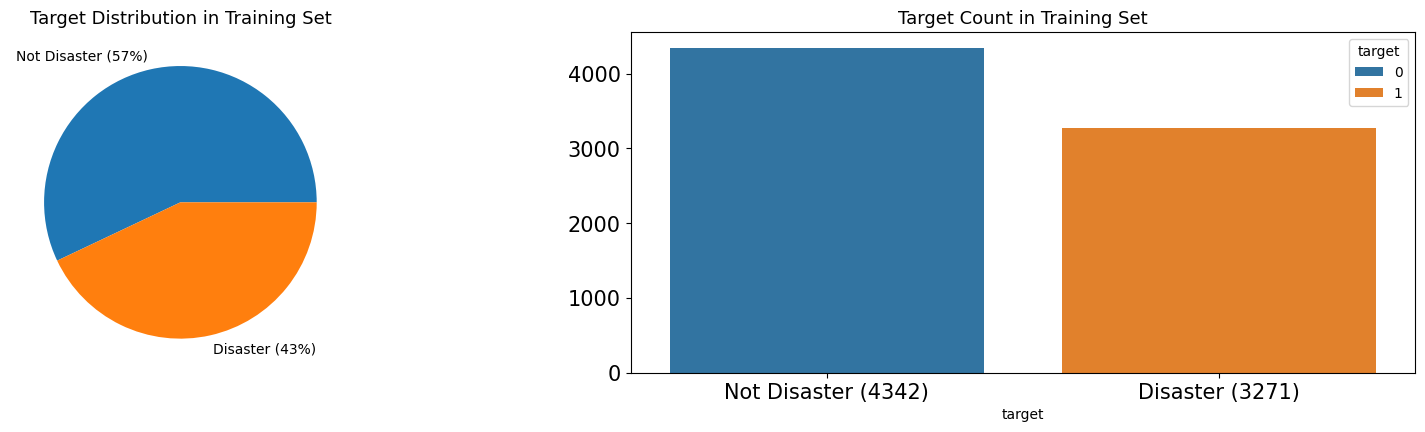

In [ ]:
train_length = len(train)
disaster_length = len(train[train['target'] == 1])
non_disaster_length = train_length - disaster_length
non_disaster_percentage = non_disaster_length * 100 // train_length
disaster_percentage = 100 - non_disaster_percentage

fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)
plt.tight_layout()

train.groupby('target')['text'].count().plot(kind='pie', ax=axes[0], labels=[f'Not Disaster ({non_disaster_percentage}%)', f'Disaster ({disaster_percentage}%)'])
sns.countplot(x=train['target'], hue=train['target'], ax=axes[1])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels([f'Not Disaster ({non_disaster_length})', f'Disaster ({disaster_length})'])
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Target Distribution in Training Set', fontsize=13)
axes[1].set_title('Target Count in Training Set', fontsize=13)

plt.show()

In [ ]:
rank = train.groupby('keyword')['text'].count()

top = pd.DataFrame({'keyword':rank.index,'count':rank.values}).sort_values(by=['count']).tail(20)

bottom = pd.DataFrame({'keyword':rank.index,'count':rank.values}).sort_values(by=['count']).head(20)

221 total unique keywords


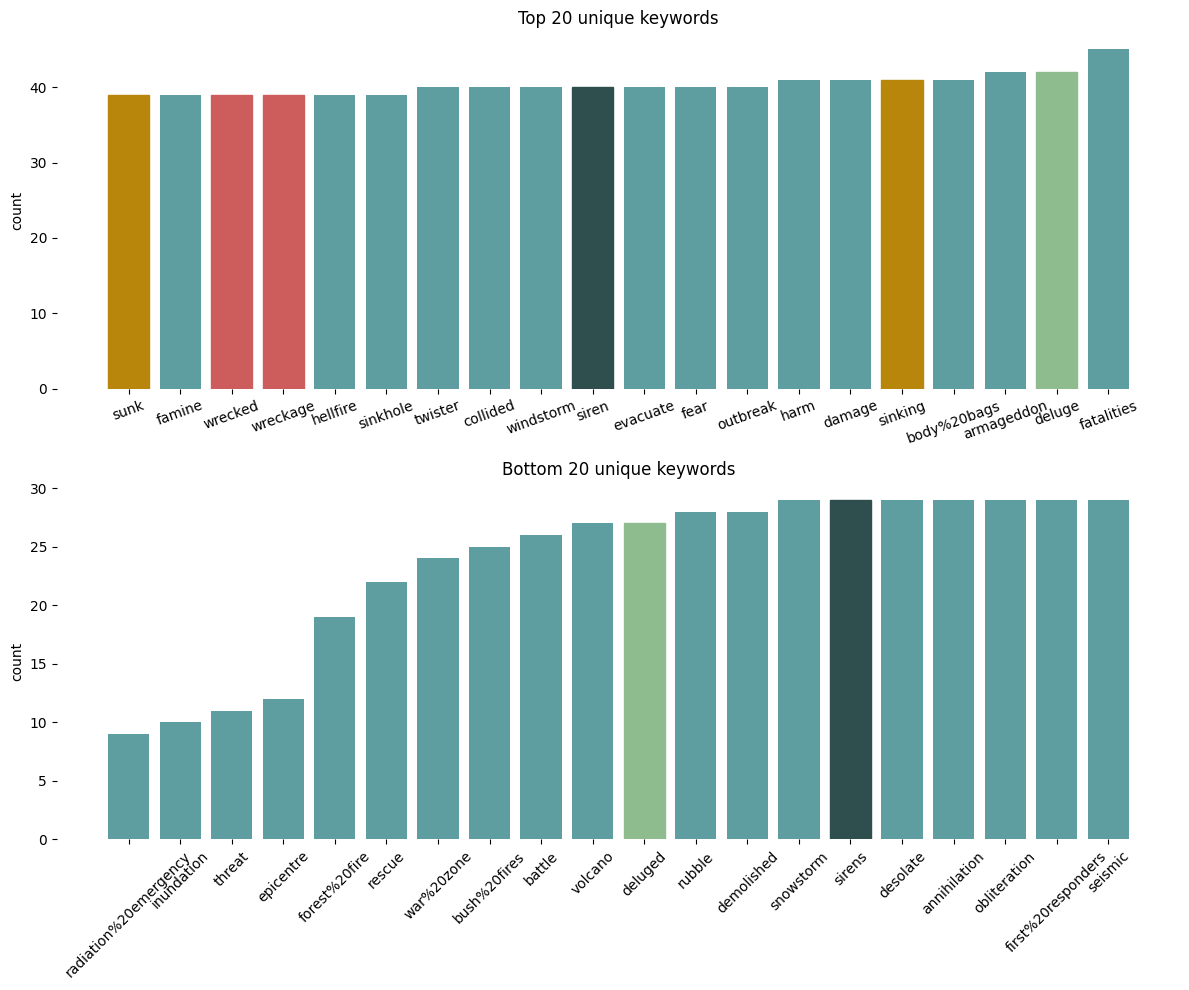

In [ ]:
plt.figure(figsize=(12,10))

plt.subplot(211)
barlist = plt.bar(data=top, x = 'keyword',height = 'count',color = 'cadetblue')
plt.xticks(rotation = 20);
plt.ylabel('count')
plt.title('Top 20 unique keywords')
barlist[0].set_color('darkgoldenrod');
barlist[2].set_color('indianred');
barlist[3].set_color('indianred');
barlist[15].set_color('darkgoldenrod');
barlist[9].set_color('darkslategrey');
barlist[18].set_color('darkseagreen');

plt.subplot(212)
barlist = plt.bar(data=bottom, x = 'keyword',height = 'count', color = 'cadetblue');
plt.xticks(rotation = 45);
plt.ylabel('count');
plt.title('Bottom 20 unique keywords')
barlist[14].set_color('darkslategrey');
barlist[10].set_color('darkseagreen');

sns.despine(left = True, bottom  = True)
plt.tight_layout()

print(str(train['keyword'].nunique())+ ' total unique keywords')

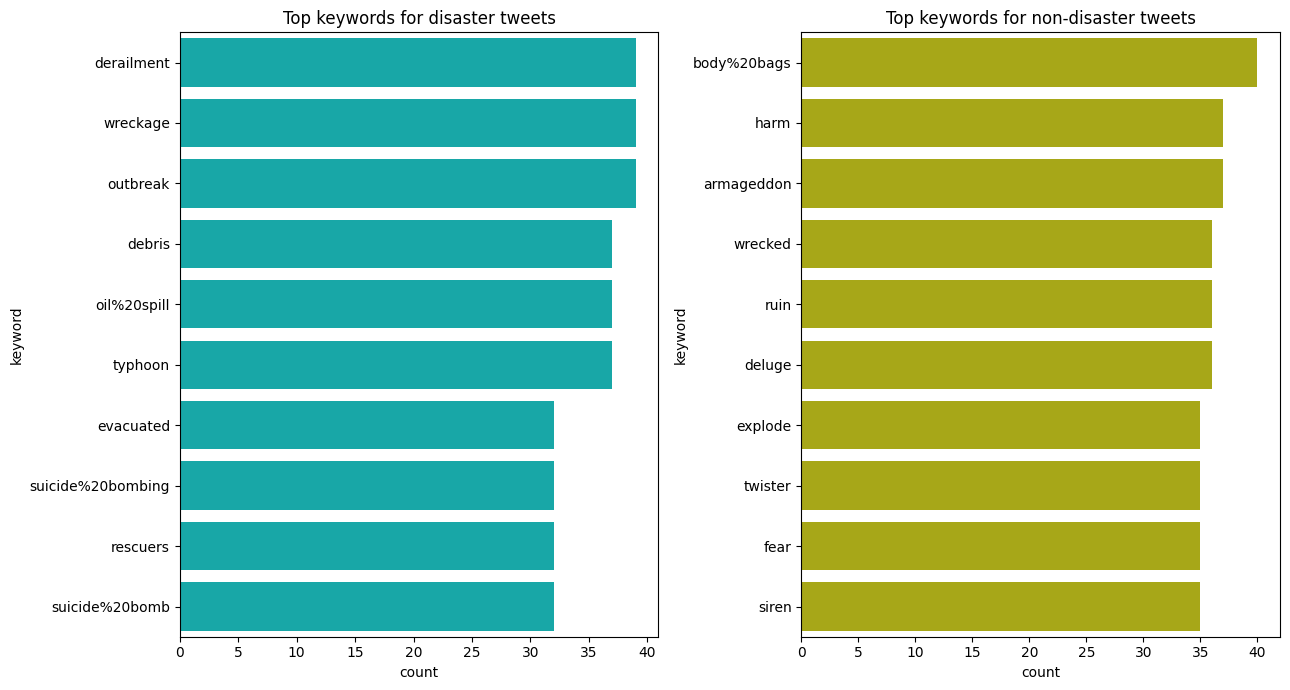

In [ ]:
kw_d = train[train.target==1].keyword.value_counts().head(10)
kw_nd = train[train.target==0].keyword.value_counts().head(10)

plt.figure(figsize=(13,7))
plt.subplot(121)
sns.barplot(x=kw_d, y=kw_d.index, color='c')
plt.title('Top keywords for disaster tweets')
plt.subplot(122)
sns.barplot(x=kw_nd, y=kw_nd.index, color='y')
plt.title('Top keywords for non-disaster tweets')
plt.tight_layout()
plt.show()

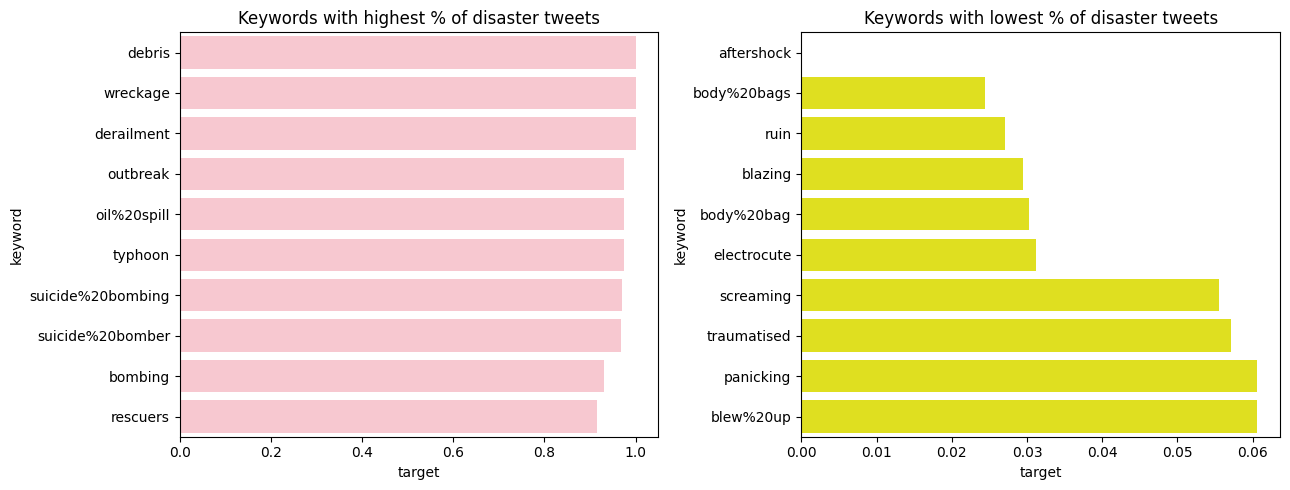

In [ ]:
top_d = train.groupby('keyword')['target'].mean().sort_values(ascending=False).head(10)
top_lowest_d = train.groupby('keyword')['target'].mean().sort_values().head(10)

plt.figure(figsize=(13,5))
plt.subplot(121)
sns.barplot(x=top_d, y=top_d.index, color='pink')
plt.title('Keywords with highest % of disaster tweets')
plt.subplot(122)
sns.barplot(x=top_lowest_d, y=top_lowest_d.index, color='yellow')
plt.title('Keywords with lowest % of disaster tweets')
plt.tight_layout()
plt.show()

In [ ]:
from collections import defaultdict
from wordcloud import STOPWORDS

disaster_tweets = train[train['target'] == 1].index


def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 20

# Unigrams
disaster_unigrams = defaultdict(int)
nondisaster_unigrams = defaultdict(int)

for tweet in train.iloc[disaster_tweets]['text']:
    for word in generate_ngrams(tweet):
        disaster_unigrams[word] += 1

for tweet in train.iloc[~disaster_tweets]['text']:
    for word in generate_ngrams(tweet):
        nondisaster_unigrams[word] += 1

df_disaster_unigrams = pd.DataFrame(sorted(disaster_unigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_unigrams = pd.DataFrame(sorted(nondisaster_unigrams.items(), key=lambda x: x[1])[::-1])

# Bigrams
disaster_bigrams = defaultdict(int)
nondisaster_bigrams = defaultdict(int)

for tweet in train.iloc[disaster_tweets]['text']:
    for word in generate_ngrams(tweet, n_gram=2):
        disaster_bigrams[word] += 1

for tweet in train.iloc[~disaster_tweets]['text']:
    for word in generate_ngrams(tweet, n_gram=2):
        nondisaster_bigrams[word] += 1

df_disaster_bigrams = pd.DataFrame(sorted(disaster_bigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_bigrams = pd.DataFrame(sorted(nondisaster_bigrams.items(), key=lambda x: x[1])[::-1])

# Trigrams
disaster_trigrams = defaultdict(int)
nondisaster_trigrams = defaultdict(int)

for tweet in train.iloc[disaster_tweets]['text']:
    for word in generate_ngrams(tweet, n_gram=3):
        disaster_trigrams[word] += 1

for tweet in train.iloc[~disaster_tweets]['text']:
    for word in generate_ngrams(tweet, n_gram=3):
        nondisaster_trigrams[word] += 1

df_disaster_trigrams = pd.DataFrame(sorted(disaster_trigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_trigrams = pd.DataFrame(sorted(nondisaster_trigrams.items(), key=lambda x: x[1])[::-1])

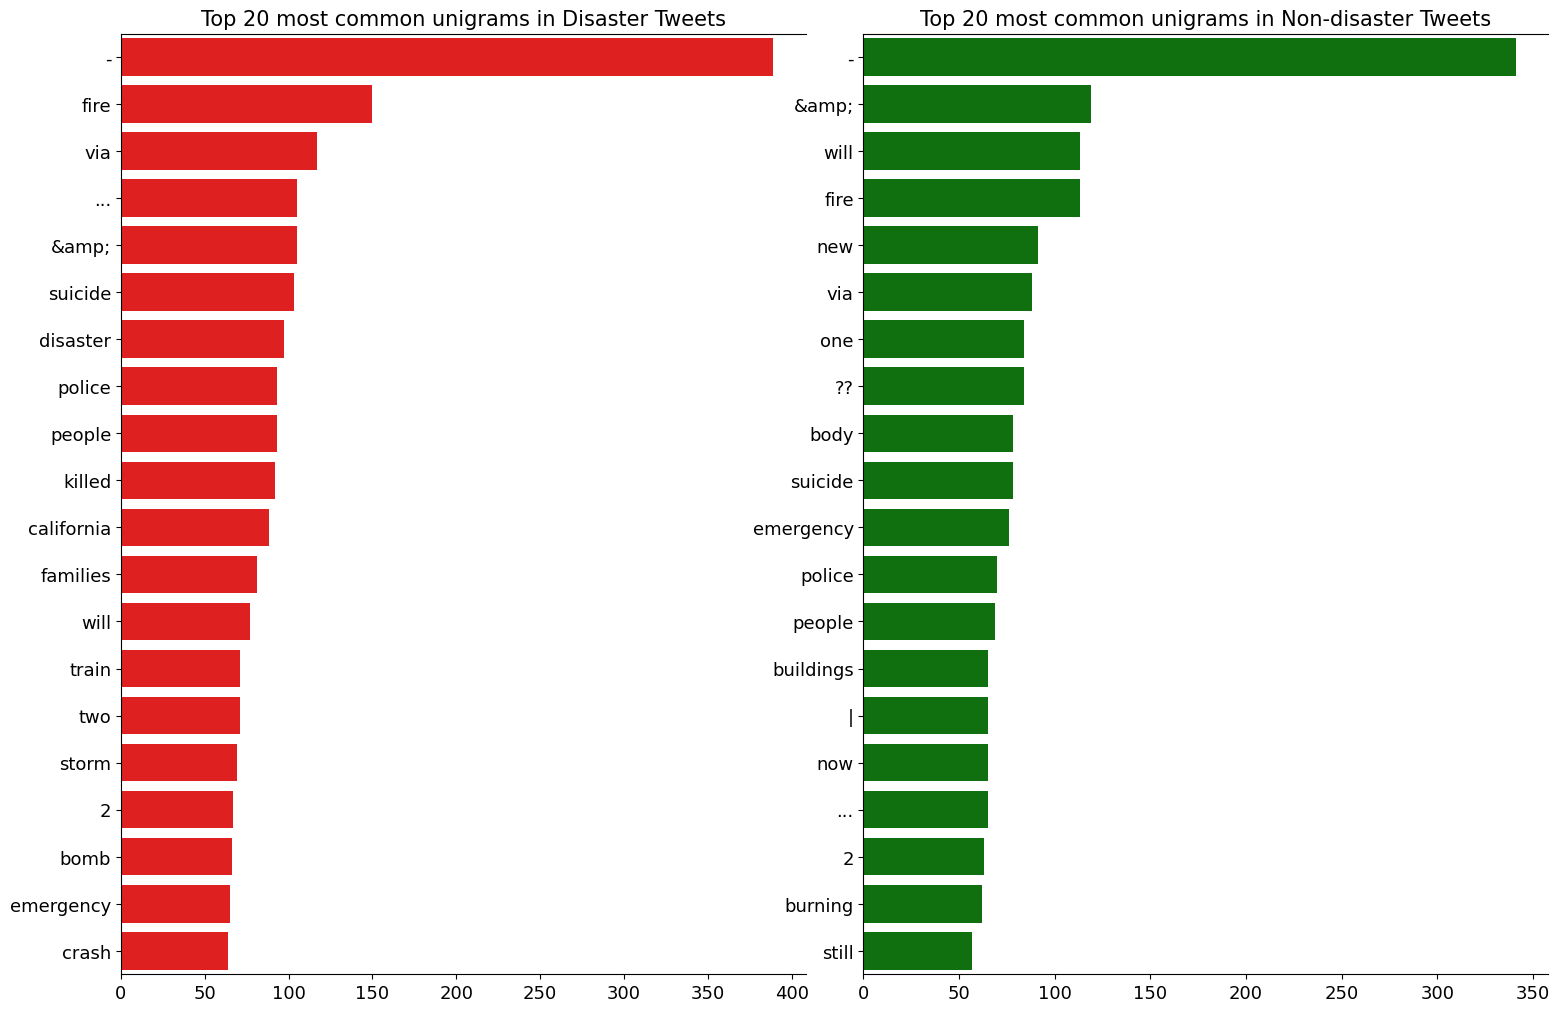

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 10), dpi=100)
plt.tight_layout()

sns.barplot(y=df_disaster_unigrams[0].values[:N], x=df_disaster_unigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_nondisaster_unigrams[0].values[:N], x=df_nondisaster_unigrams[1].values[:N], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common unigrams in Disaster Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common unigrams in Non-disaster Tweets', fontsize=15)

plt.show()

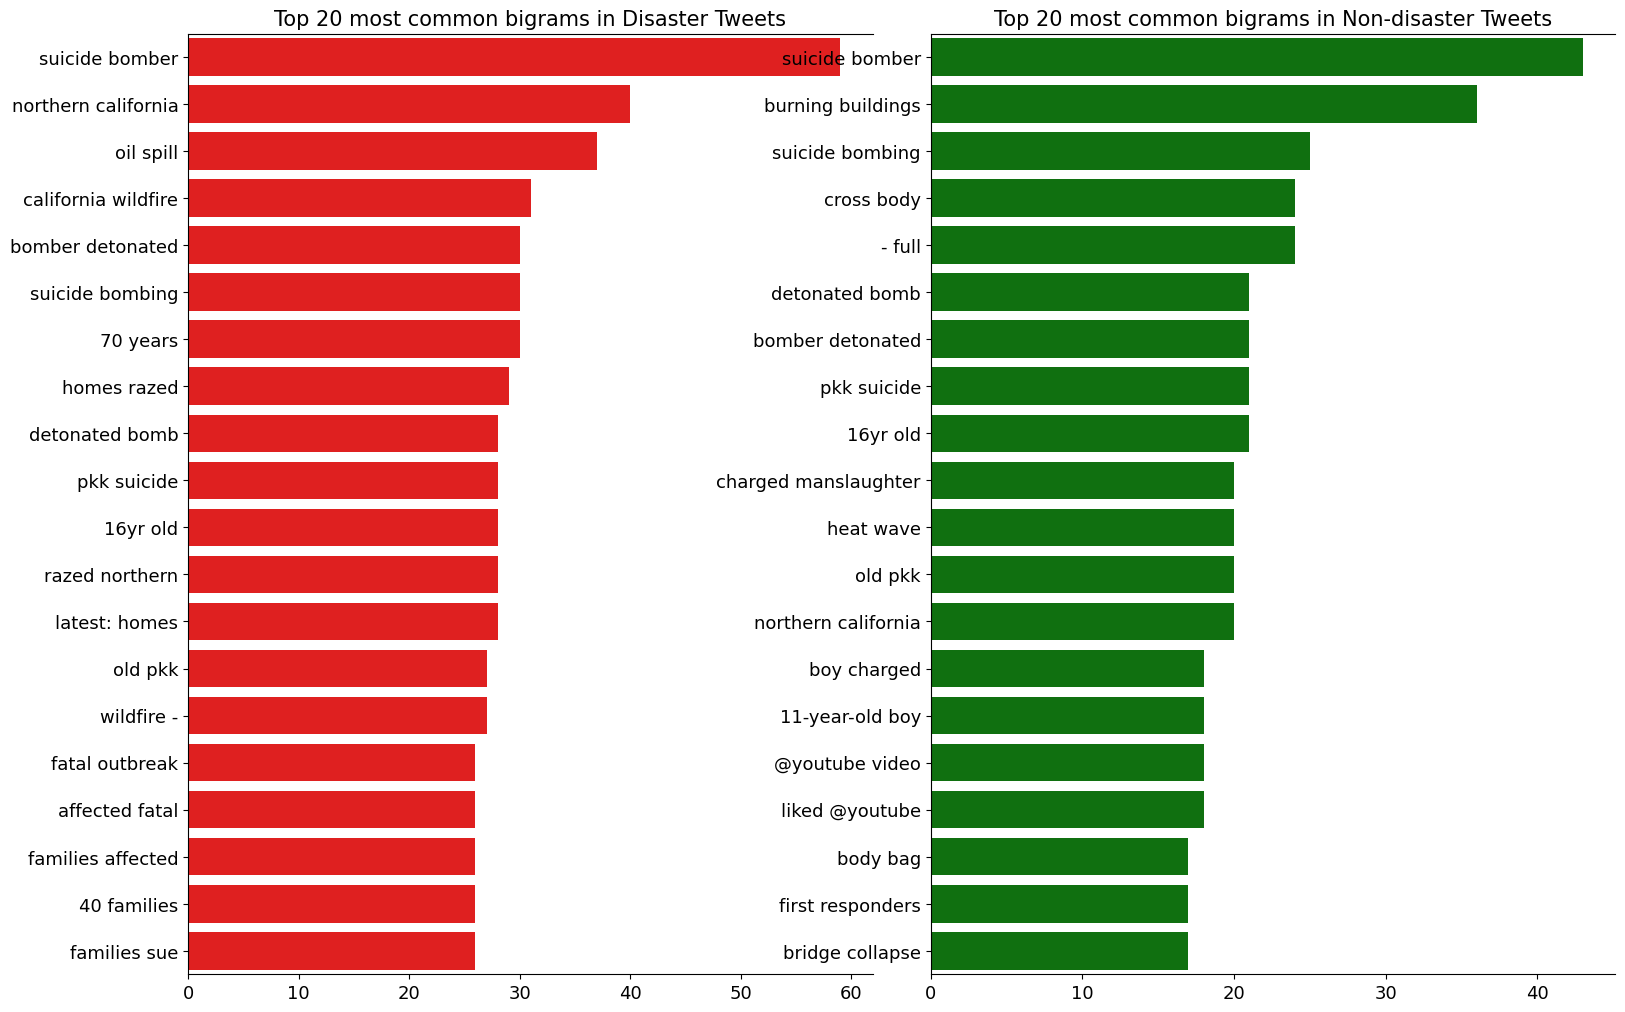

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 10), dpi=100)
plt.tight_layout()

sns.barplot(y=df_disaster_bigrams[0].values[:N], x=df_disaster_bigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_nondisaster_bigrams[0].values[:N], x=df_nondisaster_bigrams[1].values[:N], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common bigrams in Disaster Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common bigrams in Non-disaster Tweets', fontsize=15)

plt.show()

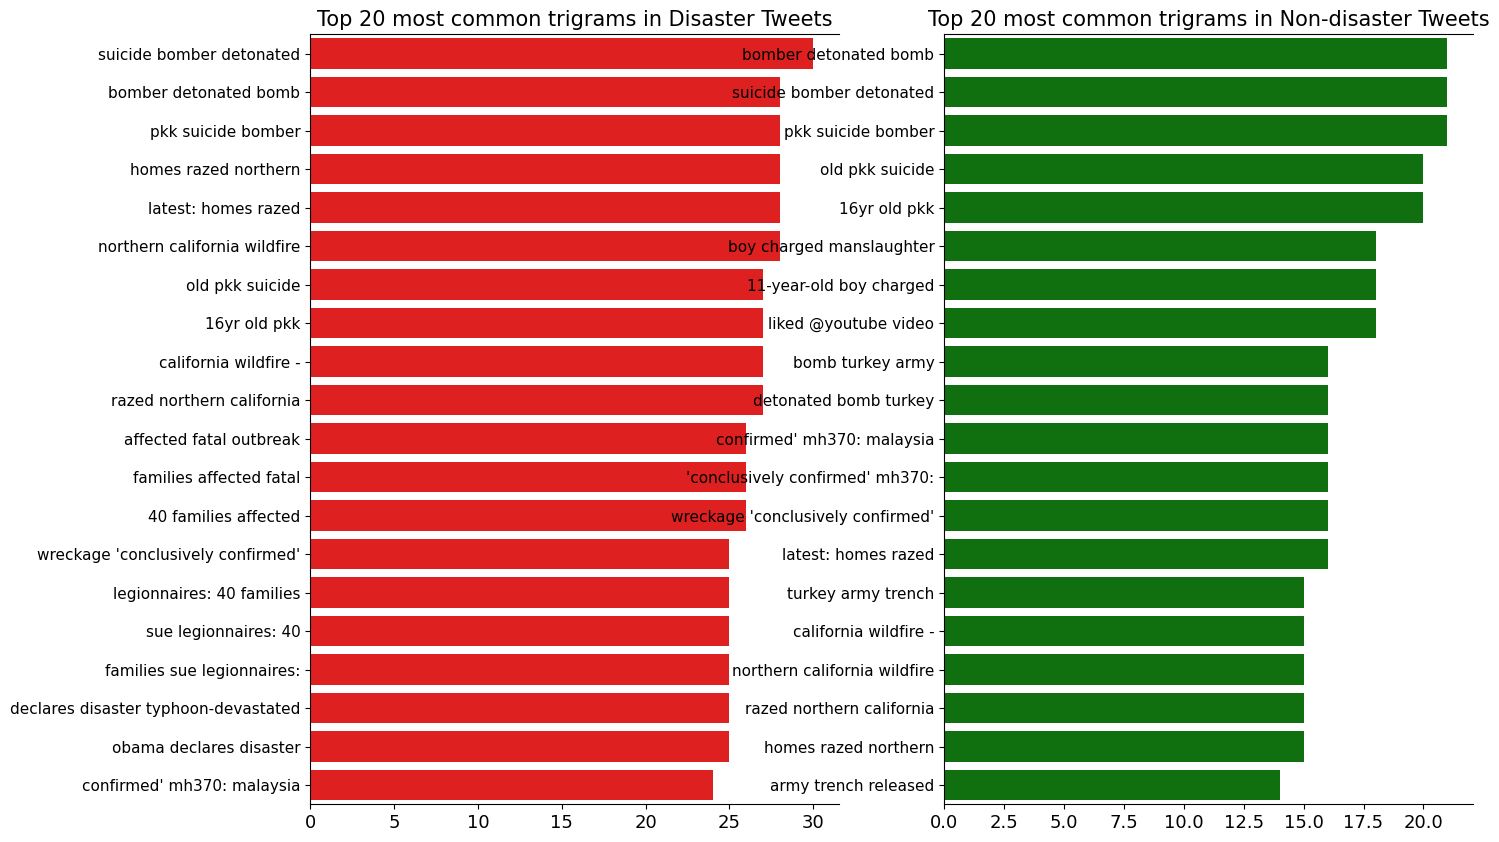

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 10), dpi=100)

sns.barplot(y=df_disaster_trigrams[0].values[:N], x=df_disaster_trigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_nondisaster_trigrams[0].values[:N], x=df_nondisaster_trigrams[1].values[:N], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=11)

axes[0].set_title(f'Top {N} most common trigrams in Disaster Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common trigrams in Non-disaster Tweets', fontsize=15)

plt.show()

# preprocess

## null valu handling

In [ ]:
print("null counts:", train.isnull().sum())

null counts: keyword    61
text        0
target      0
dtype: int64


In [ ]:
train = train.fillna('None')

In [ ]:
print("null counts:", train.isnull().sum())

null counts: keyword    0
text       0
target     0
dtype: int64


## duplicate handling

In [ ]:
print("duplicate counts:", train.duplicated().sum())

duplicate counts: 72


In [ ]:
dup = train[train.duplicated()]
dup

,keyword,text,target
48,ablaze,Check these out: http://t.co/rOI2NSmEJJ http:/...,0
115,aftershock,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vA...,0
119,aftershock,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/TH...,0
164,airplane%20accident,Experts in France begin examining airplane deb...,1
630,bioterrorism,To fight bioterrorism sir.,1
...,...,...,...
6392,suicide%20bomb,#Bestnaijamade: 16yr old PKK suicide bomber wh...,1
6449,suicide%20bombing,'Suicide bombing at [location named]...' #prem...,1
6656,terrorist,RT AbbsWinston: #Zionist #Terrorist kidnapped ...,1
7533,wreckage,Wreckage 'Conclusively Confirmed' as From MH37...,1


In [ ]:
w = train[train['text'] == train.iloc[6392]['text']]
print(w)
print(w.iloc[0]['text'])
print(w.iloc[1]['text'])

             keyword                                               text  \
6363  suicide%20bomb  #Bestnaijamade: 16yr old PKK suicide bomber wh...   
6366  suicide%20bomb  #Bestnaijamade: 16yr old PKK suicide bomber wh...   
6373  suicide%20bomb  #Bestnaijamade: 16yr old PKK suicide bomber wh...   
6377  suicide%20bomb  #Bestnaijamade: 16yr old PKK suicide bomber wh...   
6378  suicide%20bomb  #Bestnaijamade: 16yr old PKK suicide bomber wh...   
6392  suicide%20bomb  #Bestnaijamade: 16yr old PKK suicide bomber wh...   

      target  
6363       1  
6366       1  
6373       1  
6377       1  
6378       1  
6392       1  
#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_
#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_


In [ ]:
train = train.drop_duplicates()

In [ ]:
train.shape

(7541, 3)

## mislabled targets handling

In [ ]:
df_mislabeled = train.groupby(['text']).nunique().sort_values(by='target', ascending=False)
df_mislabeled = df_mislabeled[df_mislabeled['target'] > 1]['target']
df_mislabeled.index.tolist()

['Caution: breathing may be hazardous to your health.',
 'wowo--=== 12000 Nigerian refugees repatriated from Cameroon',
 'He came to a land which was engulfed in tribal war and turned it into a land of peace i.e. Madinah. #ProphetMuhammad #islam',
 '#foodscare #offers2go #NestleIndia slips into loss after #Magginoodle #ban unsafe and hazardous for #humanconsumption',
 "The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is by giving half a date in charity.'",
 'To fight bioterrorism sir.',
 'In #islam saving a person is equal in reward to saving all humans! Islam is the opposite of terrorism!',
 '#Allah describes piling up #wealth thinking it would last #forever as the description of the people of #Hellfire in Surah Humaza. #Reflect',
 'RT NotExplained: The only known image of infamous hijacker D.B. Cooper. http://t.co/JlzK2HdeTG',
 'Hellfire is surrounded by desires so be careful and don\x89Ûªt let your desires control you! #Afterlife',
 "Mmmmmm I'm burning...

In [ ]:
train['target_relabeled'] = train['target'].copy()

train.loc[train['text'] == 'like for the music video I want some real action shit like burning buildings and police chases not some weak ben winston shit', 'target_relabeled'] = 0
train.loc[train['text'] == 'Hellfire is surrounded by desires so be careful and donÛªt let your desires control you! #Afterlife', 'target_relabeled'] = 0
train.loc[train['text'] == 'To fight bioterrorism sir.', 'target_relabeled'] = 0
train.loc[train['text'] == '.POTUS #StrategicPatience is a strategy for #Genocide; refugees; IDP Internally displaced people; horror; etc. https://t.co/rqWuoy1fm4', 'target_relabeled'] = 1
train.loc[train['text'] == 'CLEARED:incident with injury:I-495  inner loop Exit 31 - MD 97/Georgia Ave Silver Spring', 'target_relabeled'] = 1
train.loc[train['text'] == '#foodscare #offers2go #NestleIndia slips into loss after #Magginoodle #ban unsafe and hazardous for #humanconsumption', 'target_relabeled'] = 0
train.loc[train['text'] == 'In #islam saving a person is equal in reward to saving all humans! Islam is the opposite of terrorism!', 'target_relabeled'] = 0
train.loc[train['text'] == 'Who is bringing the tornadoes and floods. Who is bringing the climate change. God is after America He is plaguing her\n \n#FARRAKHAN #QUOTE', 'target_relabeled'] = 1
train.loc[train['text'] == 'RT NotExplained: The only known image of infamous hijacker D.B. Cooper. http://t.co/JlzK2HdeTG', 'target_relabeled'] = 1
train.loc[train['text'] == "Mmmmmm I'm burning.... I'm burning buildings I'm building.... Oooooohhhh oooh ooh...", 'target_relabeled'] = 0
train.loc[train['text'] == "wowo--=== 12000 Nigerian refugees repatriated from Cameroon", 'target_relabeled'] = 0
train.loc[train['text'] == "He came to a land which was engulfed in tribal war and turned it into a land of peace i.e. Madinah. #ProphetMuhammad #islam", 'target_relabeled'] = 0
train.loc[train['text'] == "Hellfire! We donÛªt even want to think about it or mention it so letÛªs not do anything that leads to it #islam!", 'target_relabeled'] = 0
train.loc[train['text'] == "The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is by giving half a date in charity.'", 'target_relabeled'] = 0
train.loc[train['text'] == "Caution: breathing may be hazardous to your health.", 'target_relabeled'] = 1
train.loc[train['text'] == "I Pledge Allegiance To The P.O.P.E. And The Burning Buildings of Epic City. ??????", 'target_relabeled'] = 0
train.loc[train['text'] == "#Allah describes piling up #wealth thinking it would last #forever as the description of the people of #Hellfire in Surah Humaza. #Reflect", 'target_relabeled'] = 0
train.loc[train['text'] == "that horrible sinking feeling when youÛªve been at home on your phone for a while and you realise its been on 3G this whole time", 'target_relabeled'] = 0

## correct some keywords

In [ ]:
train['keyword'] = train['keyword'].str.replace('%20','')

# Transformer model

In [ ]:
#Shuffle the DataFrame
train_dataset = shuffle(train, random_state=42)
train_dataset = shuffle(train_dataset, random_state=21)
train_dataset.head()

,keyword,text,target,target_relabeled
4049,forestfires,As California fires rage the Forest Service so...,1,1
1169,bridgecollapse,Bridge collapse not natural calamity but man-m...,1,1
1003,bodybagging,Gates not body bagging nobody???????? niggas i...,0,0
719,bleeding,you can stab me in the back but I promise you'...,1,1
4046,forestfires,The forest service now spends &gt;50% of its b...,1,1


In [ ]:
#Convert train data to tf.data.Dataset object
BATCH = 32
#Concatenate the text data of the columns "keyword", "location", "text"
train_tf = tf.data.Dataset.from_tensor_slices(
    (train_dataset['keyword'] + train_dataset['text'], train_dataset['target']))

#Convert the data into batch
train_tf = train_tf.shuffle(68).batch(BATCH)

In [ ]:
max_length = 165
max_tokens = 20_000

#Instantiate the TextVectorization layer
text_vectorization = layers.TextVectorization(max_tokens=max_tokens,
                                              output_mode='int',
                                              output_sequence_length=max_length
                                             )

In [ ]:
text_vectorization.adapt(train_tf.map(lambda twt, target: twt))

In [ ]:
#Get the vocabulary
vocab = text_vectorization.get_vocabulary()
print("Vocabulary size =",len(vocab))

#Convert the list object to NumPy array for decoding the vectorized data
vocab = np.array(vocab)

Vocabulary size = 20000


In [ ]:
#Vectorize the train dataset
train_tf = train_tf.map(lambda twt, target: (text_vectorization(twt), target),
                   num_parallel_calls=tf.data.AUTOTUNE)

In [ ]:
for sample, traget in train_tf:
    #Print the first item
    print("1st sample:",sample[0].numpy())
    print("\n")
    #Print the second item
    print("2nd sample:",sample[1].numpy())
    print("\n")
    #Print the third item
    print("3rd sample:",sample[2].numpy())
    print("\n")
    break

1st sample: [8727  230    7    1 9743 1963    3  280 1206 8884 1554  858    7 1034
   72    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0]


2nd sample: [    1    64   812     5 14015   215    40   407     9  1882     8   764
    12     0     0     0     0     0     0     0     0     0   

In [ ]:
for tx in train_tf:
    print("\t\t\t\tVectorized Tweet:\n",tx[0][0])
    print("\n\n\t\t\t\tDecoded Tweet:\n", " ".join(vocab[tx[0][0].numpy()]))
    break

				Vectorized Tweet:
 tf.Tensor(
[    1   146    32   271  3332    29  3945 12770 13820  2253 13999 16843
  3444     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     

In [ ]:
#Define a Transformer Encoder using subclassed layer
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        #Size of the input vector (size of the vocabulary)
        self.embed_dim = embed_dim
        #Size of the inner dense layer
        self.dense_dim = dense_dim
        #Number of attention heads
        self.num_heads = num_heads

        self.attention = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.dense_proj = keras.Sequential(
                   [layers.Dense(dense_dim, activation="gelu"),
                    layers.Dense(embed_dim),]
                                        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.max_pool1 = layers.GlobalMaxPooling1D()

    #Define a call() method  where forward pass is implemented
    def call(self, inputs, mask=None):
        if mask is not None:
            mask = mask[:, tf.newaxis, :]

        #Apply the attention layer
        attention_output = self.attention(inputs, inputs, attention_mask=mask)
        #Normalize the data
        proj_input = self.layernorm_1(inputs + attention_output)
        #Apply the dense layer
        proj_output = self.dense_proj(proj_input)
        #Normalize the data and return it
        return self.layernorm_2(proj_input + proj_output)

        #return self.max_pool1(norm)

    #Define configuration method
    def get_config(self):
        config = super().get_config()
        config.update({
                    "embed_dim": self.embed_dim,
                    "num_heads": self.num_heads,
                    "dense_dim": self.dense_dim,
                    })
        return config

In [ ]:
# Implementing positional embedding as a subclassed layer
class PositionalEmbedding(layers.Layer):
    def __init__(self, sequence_length, input_dim, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.sequence_length = sequence_length
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.token_embeddings = layers.Embedding(
          input_dim=input_dim, output_dim=output_dim)
        self.position_embeddings = layers.Embedding(
                   input_dim=sequence_length, output_dim=output_dim)

    def call(self, inputs):
        length = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=length, delta=1)
        embedded_tokens = self.token_embeddings(inputs)
        embedded_positions = self.position_embeddings(positions)
        return embedded_tokens + embedded_positions

    def compute_mask(self, inputs, mask=None):
            return layers.Lambda(lambda x: tf.not_equal(x, 0))(inputs)

    def get_config(self):
        config = super().get_config()
        config.update({
           "output_dim": self.output_dim,
           "sequence_length": self.sequence_length,
           "input_dim": self.input_dim,
                    })
        return config

In [ ]:
#Define the input
inputs = keras.Input(shape=(None,), dtype="int64")

#Apply positional embeddings
pos_embed = PositionalEmbedding(sequence_length=165,
                        input_dim=20_000,
                        output_dim=256)(inputs)

#Apply the encoder
encoded = TransformerEncoder(embed_dim=256,
                             dense_dim=64,
                             num_heads=8)(pos_embed)


x = layers.GlobalMaxPooling1D()(encoded)
x = layers.Dropout(0.5)(x)
output = layers.Dense(units=1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs,outputs=output)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:391: UserWarning: `build()` was called on layer 'transformer_encoder_16', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:934: UserWarning: Layer 'transformer_encoder_16' (of type TransformerEncoder) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


In [ ]:
#Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy']
             )

In [ ]:
#Summary of the model
model.summary()

Model: "functional_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_32            │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ positional_embedding_17   │ (None, None, 256)      │      5,162,240 │ input_layer_32[0][0]   │
│ (PositionalEmbedding)     │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_53 (Lambda)        │ (None, None)           │              0 │ input_layer_32[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ transformer_encoder_15    │ (None, None, 256)      │      2,121,248 │ positional_embedding_… │
│ (TransformerEncoder)      │                        │                │ lambda_53[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_30   │ (None, 256)            │              0 │ transformer_encoder_1… │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_33 (Dropout)      │ (None, 256)            │              0 │ global_max_pooling1d_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_47 (Dense)          │ (None, 1)              │            257 │ dropout_33[0][0]       │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 7,283,745 (27.79 MB)

 Trainable params: 7,283,745 (27.79 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Define callbacks
callbacks = [
       keras.callbacks.ModelCheckpoint("tweets_classifier.keras",
                                       save_best_only=True)
            ]

In [ ]:
#Define the validation data size
val_size = int(0.25 * len(train_tf))

In [ ]:
# Split the data into training and validation
validation_data = train_tf.take(val_size)
train_data = train_tf.skip(val_size)

In [ ]:
history = model.fit(train_data,
                    epochs=30,
                    validation_data=validation_data,
                    callbacks=callbacks)

Epoch 1/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 20s 69ms/step - accuracy: 0.5071 - loss: 1.3564 - val_accuracy: 0.5699 - val_loss: 0.7110
Epoch 2/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.5289 - loss: 1.2424 - val_accuracy: 0.5879 - val_loss: 0.6872
Epoch 3/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.5422 - loss: 1.1513 - val_accuracy: 0.6065 - val_loss: 0.6595
Epoch 4/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.5558 - loss: 1.0680 - val_accuracy: 0.6298 - val_loss: 0.6405
Epoch 5/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.5844 - loss: 0.9376 - val_accuracy: 0.6658 - val_loss: 0.6194
Epoch 6/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.5770 - loss: 0.8619 - val_accuracy: 0.6769 - val_loss: 0.6102
Epoch 7/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.5997 - loss: 0.7909 - val_accuracy: 0.6944 - val_loss: 0.5965
Epoch 8/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.6249 - loss: 0.7444 - val_acc

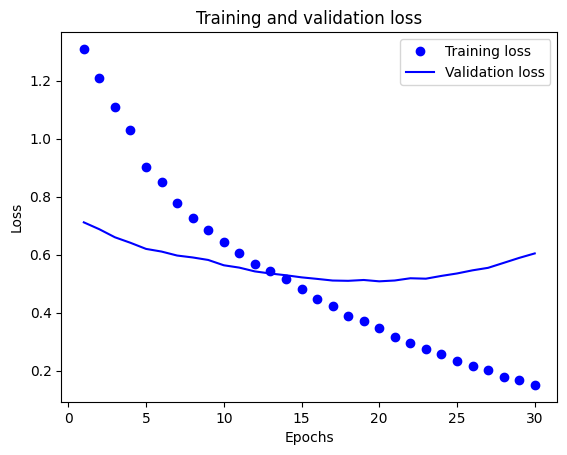

In [ ]:
# Plotting the training and validation loss
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

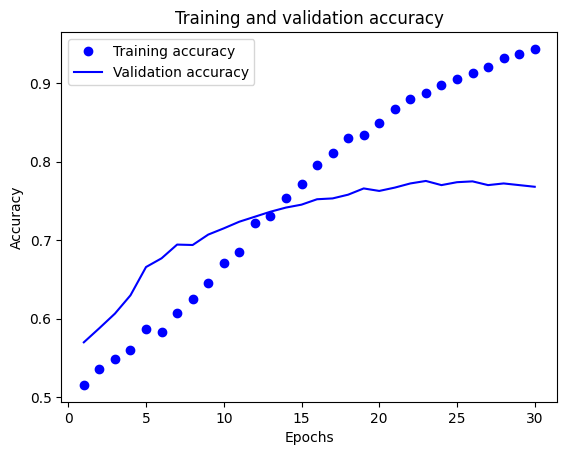

In [ ]:
# Plotting the training and validation accuracy
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()